# 🧩 Cell 1: Imports and Logger Initialization

In [1]:
cd ..

/home/abdalrhman/Desktop/Graduation Project/AiStore/Recommender_V1


In [2]:
import os
import sys
import pandas as pd
from srcs.utils.logger import get_module_logger

# Get the current working directory and determine the project root
NOTEBOOK_DIR = os.getcwd()  # This gets the current working directory
PROJECT_ROOT = os.path.abspath(os.path.join(NOTEBOOK_DIR, "../../"))  # Move two directories up to the project root

# Add the project root to sys.path
sys.path.append(PROJECT_ROOT)

from srcs.utils.settings import METADATA_PATH, REVIEWS_PATH, CLEANED_REVIEWS_PATH_CSV, CLEANED_REVIEWS_PATH_PARQUET

# Set up the logger
logger = get_module_logger("reviews_cleaning")


# 🗂️ Cell 2: Load the Dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt  # Importing matplotlib for plotting

reviews_df = pd.read_csv(REVIEWS_PATH)

# Display first few rows for a quick overview
print (" ----------- First 5 Rows of the Dataset -----------")
reviews_df.head(5)


 ----------- First 5 Rows of the Dataset -----------


,user_id,parent_asin,rating,timestamp
0,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B0047T79VS,3.0,1344406083000
1,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B01HHURN3W,3.0,1408995743000
2,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B00L0YLRUW,1.0,1439226089000
3,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B017T99JPG,5.0,1456772365000
4,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B01LW71IBJ,5.0,1456772571000


In [4]:
# DataFrame Summary
print("\n ----------- DataFrame Summary Info -----------")
print(reviews_df.info())

# Descriptive Statistics for numeric columns
print("\n ----------- Descriptive Statistics -----------")
print(reviews_df.describe())


 ----------- DataFrame Summary Info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15473536 entries, 0 to 15473535
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      object 
 1   parent_asin  object 
 2   rating       float64
 3   timestamp    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 472.2+ MB
None

 ----------- Descriptive Statistics -----------
             rating     timestamp
count  1.547354e+07  1.547354e+07
mean   4.248277e+00  1.517074e+12
std    1.265287e+00  1.029644e+11
min    1.000000e+00  9.293118e+11
25%    4.000000e+00  1.444252e+12
50%    5.000000e+00  1.523054e+12
75%    5.000000e+00  1.600401e+12
max    5.000000e+00  1.694509e+12


In [5]:
# Shape and other details
print("\n ----------- Shape, Columns, and Index Info -----------")
print(f"\nShape: {reviews_df.shape}")
print(f"\nColumns: {reviews_df.columns}")
print(f"\nIndex: {reviews_df.index}")
print(f"\nData Types: {reviews_df.dtypes}")
print(f"\nUnique Values per Column: {reviews_df.nunique()}")
print(f"\nNon-null Counts: {reviews_df.count()}")


 ----------- Shape, Columns, and Index Info -----------

Shape: (15473536, 4)

Columns: Index(['user_id', 'parent_asin', 'rating', 'timestamp'], dtype='object')

Index: RangeIndex(start=0, stop=15473536, step=1)

Data Types: user_id         object
parent_asin     object
rating         float64
timestamp        int64
dtype: object

Unique Values per Column: user_id         1641026
parent_asin      368228
rating                5
timestamp      15314869
dtype: int64

Non-null Counts: user_id        15473536
parent_asin    15473536
rating         15473536
timestamp      15473536
dtype: int64


In [6]:
# Checking for missing values in the dataset
print("\n ----------- Missing Values Summary -----------")
print(reviews_df.isnull().sum())



 ----------- Missing Values Summary -----------
user_id        0
parent_asin    0
rating         0
timestamp      0
dtype: int64


# 📊 Cell 3: Rating Distribution and Visualization

----------- Rating Value Counts -----------
rating
5.0    10207023
4.0     2190347
1.0     1287788
3.0     1074820
2.0      713558
Name: count, dtype: int64


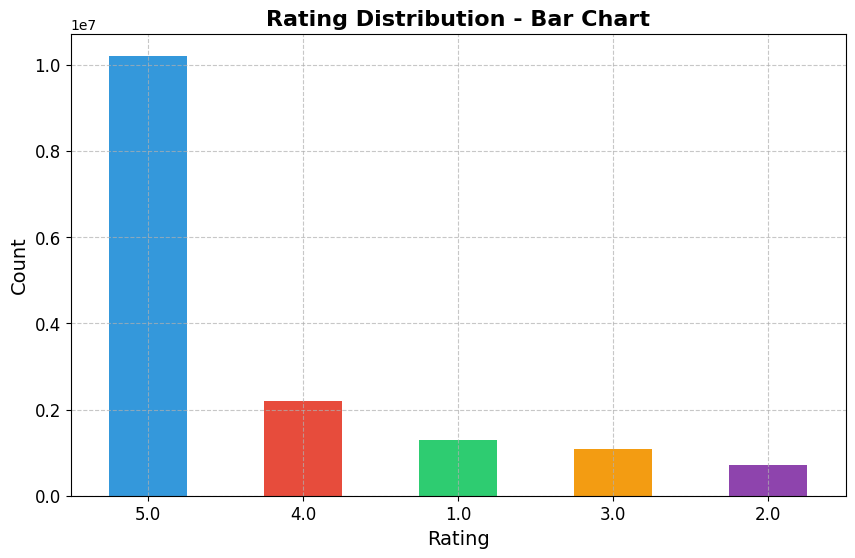

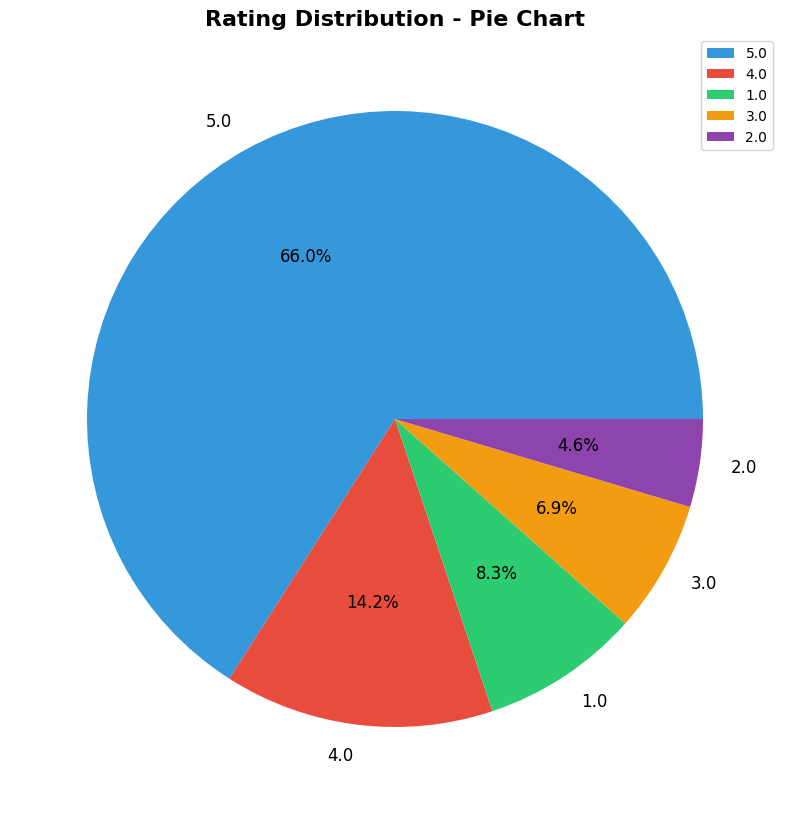

In [7]:
import matplotlib.pyplot as plt

rating_counts = reviews_df['rating'].value_counts()

print("----------- Rating Value Counts -----------")
print(rating_counts)

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#8e44ad']

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=colors)
plt.title('Rating Distribution - Bar Chart', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 10))
rating_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, legend=True, textprops={'fontsize': 12})
plt.title('Rating Distribution - Pie Chart', fontsize=16, weight='bold')
plt.ylabel('')  
plt.show()


# 🔍 3. Remove or Impute Missing Values

In [8]:
# If there were missing values in important columns (e.g., 'rating', 'user_id', 'parent_asin')
reviews_df.dropna(subset=['rating', 'user_id', 'parent_asin'], inplace=True)

# 4. Convert Timestamps

In [9]:
# Convert the timestamp from epoch time to datetime
reviews_df['timestamp'] = pd.to_datetime(reviews_df['timestamp'], unit='ms')

# Check the conversion
print(reviews_df.head())

                        user_id parent_asin  rating           timestamp
0  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ  B0047T79VS     3.0 2012-08-08 06:08:03
1  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ  B01HHURN3W     3.0 2014-08-25 19:42:23
2  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ  B00L0YLRUW     1.0 2015-08-10 17:01:29
3  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ  B017T99JPG     5.0 2016-02-29 18:59:25
4  AGCI7FAH4GL5FI65HYLKWTMFZ2CQ  B01LW71IBJ     5.0 2016-02-29 19:02:51


# 5. Ensure the correct data types


In [10]:
reviews_df['rating'] = reviews_df['rating'].astype(float)
reviews_df['user_id'] = reviews_df['user_id'].astype('category')
reviews_df['parent_asin'] = reviews_df['parent_asin'].astype('category')

# Check the updated data types
print(reviews_df.dtypes)

user_id              category
parent_asin          category
rating                float64
timestamp      datetime64[ns]
dtype: object


# 6. Filter Out Unnecessary Data

In [11]:
# For example, keeping only reviews with ratings 3 and above
reviews_df = reviews_df[reviews_df['rating'] >= 3]

----------- Rating Value Counts -----------
rating
5.0    10207023
4.0     2190347
3.0     1074820
Name: count, dtype: int64


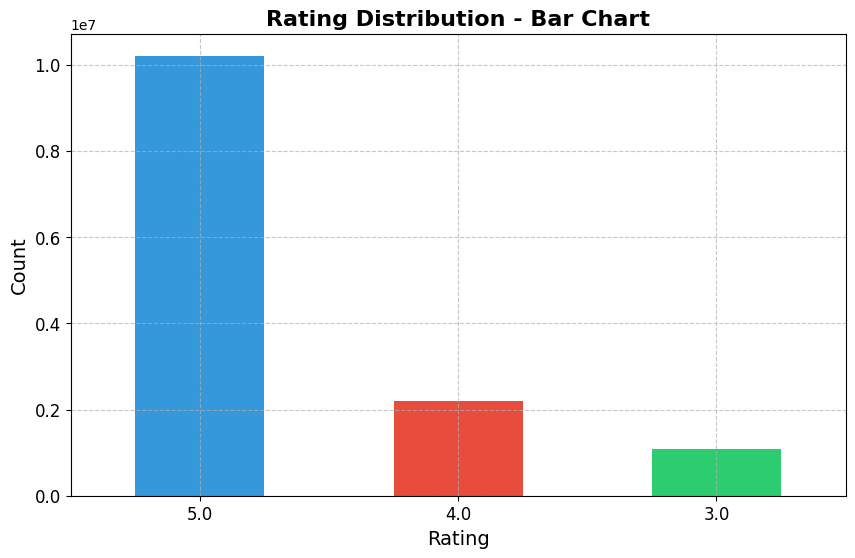

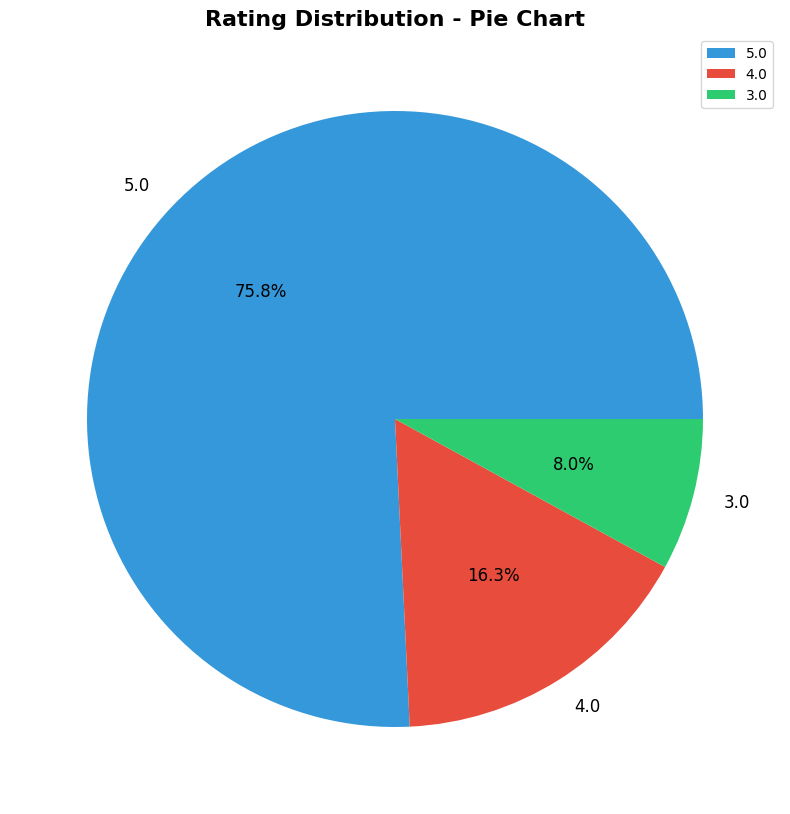

In [12]:
import matplotlib.pyplot as plt

rating_counts = reviews_df['rating'].value_counts()

print("----------- Rating Value Counts -----------")
print(rating_counts)

colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#8e44ad']

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color=colors)
plt.title('Rating Distribution - Bar Chart', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 10))
rating_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, legend=True, textprops={'fontsize': 12})
plt.title('Rating Distribution - Pie Chart', fontsize=16, weight='bold')
plt.ylabel('')  
plt.show()


In [13]:
# DataFrame Summary
print("\n ----------- DataFrame Summary Info -----------")
print(reviews_df.info())

# Descriptive Statistics for numeric columns
print("\n ----------- Descriptive Statistics -----------")
print(reviews_df.describe())


 ----------- DataFrame Summary Info -----------
<class 'pandas.core.frame.DataFrame'>
Index: 13472190 entries, 0 to 15473535
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   user_id      category      
 1   parent_asin  category      
 2   rating       float64       
 3   timestamp    datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 499.0 MB
None

 ----------- Descriptive Statistics -----------
             rating                      timestamp
count  1.347219e+07                       13472190
mean   4.677856e+00  2018-01-17 18:40:41.492691712
min    3.000000e+00            1999-06-13 22:10:04
25%    5.000000e+00     2015-09-28 18:32:48.500000
50%    5.000000e+00  2018-03-19 21:22:04.934000128
75%    5.000000e+00  2020-08-30 00:52:11.144499968
max    5.000000e+00     2023-09-12 09:00:55.248000
std    6.147590e-01                            NaN


# 2. Handling Time-based Analysis

In [14]:
reviews_df['year'] = reviews_df['timestamp'].dt.year
reviews_df['month'] = reviews_df['timestamp'].dt.month
reviews_df['day'] = reviews_df['timestamp'].dt.day
reviews_df['hour'] = reviews_df['timestamp'].dt.hour
reviews_df['minute'] = reviews_df['timestamp'].dt.minute

In [15]:
reviews_df.head()

,user_id,parent_asin,rating,timestamp,year,month,day,hour,minute
0,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B0047T79VS,3.0,2012-08-08 06:08:03.000,2012,8,8,6,8
1,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B01HHURN3W,3.0,2014-08-25 19:42:23.000,2014,8,25,19,42
3,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B017T99JPG,5.0,2016-02-29 18:59:25.000,2016,2,29,18,59
4,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B01LW71IBJ,5.0,2016-02-29 19:02:51.000,2016,2,29,19,2
5,AGCI7FAH4GL5FI65HYLKWTMFZ2CQ,B09S6Y5BRG,5.0,2018-11-04 18:40:31.659,2018,11,4,18,40


In [16]:
print(f"Memory usage: {reviews_df.memory_usage(deep=True).sum() / 1024**2} MB")

Memory usage: 881.8872928619385 MB


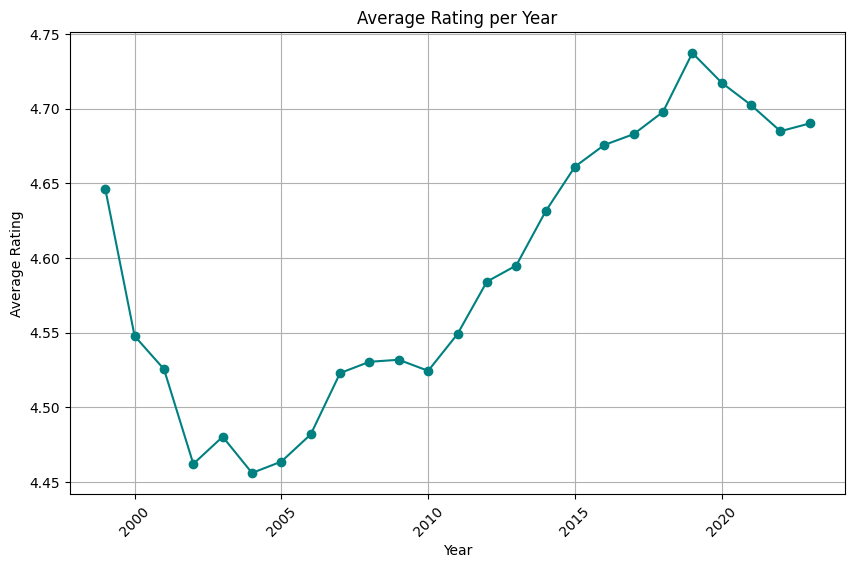

In [17]:
# Group by year and calculate the average rating
yearly_ratings = reviews_df.groupby('year')['rating'].mean()

# Plot the average rating by year
yearly_ratings.plot(kind='line', figsize=(10, 6), color='teal', marker='o')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [18]:
# Get the current time (or reference time)
current_time = pd.to_datetime('now')

# Calculate the difference in days between the review timestamp and current time
reviews_df['recency'] = (current_time - reviews_df['timestamp']).dt.days

In [19]:
# Sort reviews by recency (ascending order: more recent reviews first)
recent_reviews_df = reviews_df.sort_values(by='recency', ascending=True)

# Display the most recent reviews
recent_reviews_df.head(10)

,user_id,parent_asin,rating,timestamp,year,month,day,hour,minute,recency
15473494,AHEVERSXAPAUQWUHTK5SDJMF5CNQ,B0BJCYR1P7,5.0,2023-09-12 09:00:55.248,2023,9,12,9,0,598
15472133,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B00009EHJV,5.0,2023-09-10 21:49:46.606,2023,9,10,21,49,599
15471648,AFCYY3TAXQUHEJIBX32PMA4BT7HA,B00C4XVOOC,4.0,2023-09-11 02:17:59.206,2023,9,11,2,17,599
15472132,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B07432V11H,5.0,2023-09-10 21:42:39.119,2023,9,10,21,42,599
15472136,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B07H65KP63,5.0,2023-09-10 23:04:26.164,2023,9,10,23,4,599
15472135,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B0B3DKSHVB,5.0,2023-09-10 22:24:01.219,2023,9,10,22,24,599
15470986,AEZ4XWTIIW6LIL375XUR3H65PIRA,B09YY692BN,5.0,2023-09-11 20:07:31.278,2023,9,11,20,7,599
15472134,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B0C2JFWR52,5.0,2023-09-10 22:15:13.085,2023,9,10,22,15,599
15472147,AHBRELOMLRYIJVQYAJMEEW3633EA,B078SGZZXR,5.0,2023-09-10 00:51:36.479,2023,9,10,0,51,600
15472148,AHBRELOMLRYIJVQYAJMEEW3633EA,B00W5X1I9C,5.0,2023-09-10 01:00:31.828,2023,9,10,1,0,600


In [20]:
# Example: Create a weight based on recency (inverse of days)
reviews_df['recency_weight'] = 1 / (reviews_df['recency'] + 1)

# Sort by recency_weight to prioritize recent reviews
weighted_reviews_df = reviews_df.sort_values(by='recency_weight', ascending=False)

# Display reviews with highest recency weight
weighted_reviews_df.head(10)

,user_id,parent_asin,rating,timestamp,year,month,day,hour,minute,recency,recency_weight
15473494,AHEVERSXAPAUQWUHTK5SDJMF5CNQ,B0BJCYR1P7,5.0,2023-09-12 09:00:55.248,2023,9,12,9,0,598,0.001669
15470986,AEZ4XWTIIW6LIL375XUR3H65PIRA,B09YY692BN,5.0,2023-09-11 20:07:31.278,2023,9,11,20,7,599,0.001667
15472132,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B07432V11H,5.0,2023-09-10 21:42:39.119,2023,9,10,21,42,599,0.001667
15472135,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B0B3DKSHVB,5.0,2023-09-10 22:24:01.219,2023,9,10,22,24,599,0.001667
15472134,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B0C2JFWR52,5.0,2023-09-10 22:15:13.085,2023,9,10,22,15,599,0.001667
15472136,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B07H65KP63,5.0,2023-09-10 23:04:26.164,2023,9,10,23,4,599,0.001667
15472133,AFXLODEEGRJO5QWYLX7FGNWQDHMQ,B00009EHJV,5.0,2023-09-10 21:49:46.606,2023,9,10,21,49,599,0.001667
15471648,AFCYY3TAXQUHEJIBX32PMA4BT7HA,B00C4XVOOC,4.0,2023-09-11 02:17:59.206,2023,9,11,2,17,599,0.001667
15472148,AHBRELOMLRYIJVQYAJMEEW3633EA,B00W5X1I9C,5.0,2023-09-10 01:00:31.828,2023,9,10,1,0,600,0.001664
15472147,AHBRELOMLRYIJVQYAJMEEW3633EA,B078SGZZXR,5.0,2023-09-10 00:51:36.479,2023,9,10,0,51,600,0.001664


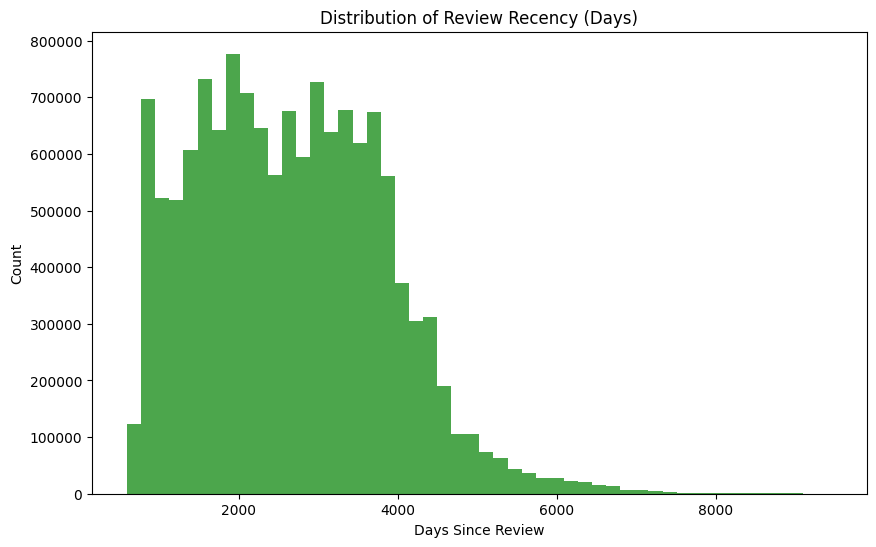

In [21]:
# Plot the distribution of recency (days since review)
plt.figure(figsize=(10, 6))
reviews_df['recency'].plot(kind='hist', bins=50, color='green', alpha=0.7)
plt.title('Distribution of Review Recency (Days)')
plt.xlabel('Days Since Review')
plt.ylabel('Count')
plt.show()


In [22]:
# Aggregate the average rating for reviews from the past 30 days
past_days_number = 2000
recent_ratings = reviews_df[reviews_df['recency'] <= past_days_number].groupby('parent_asin')['rating'].mean()

# Display products with highest average ratings in the last 30 days
print(recent_ratings.sort_values(ascending=False).head(10))


/tmp/ipykernel_53086/58492686.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recent_ratings = reviews_df[reviews_df['recency'] <= past_days_number].groupby('parent_asin')['rating'].mean()


parent_asin
0547152469    5.0
B07C7FF12N    5.0
B07C7GJCK6    5.0
B07C7HNH88    5.0
B07C7HTJ1S    5.0
B07C7JB115    5.0
B07C7JZZYR    5.0
B07C7K4QZW    5.0
B07C7L6P38    5.0
B07C7LZS5F    5.0
Name: rating, dtype: float64


In [23]:
# Filter reviews from the last 6 months
two_years_ago = current_time - pd.DateOffset(years=2)
recent_reviews = reviews_df[reviews_df['timestamp'] > two_years_ago]

# Analyze trends in recent reviews
recent_trends = recent_reviews.groupby('rating')['parent_asin'].count()
print(recent_trends)


rating
3.0     1684
4.0     3196
5.0    18791
Name: parent_asin, dtype: int64


In [24]:
recent_reviews.head()

,user_id,parent_asin,rating,timestamp,year,month,day,hour,minute,recency,recency_weight
3641828,AHHDFEUOHY35TJDVRMEHHXBZ2UGQ,B08SHQF55R,5.0,2023-05-02 23:00:23.470,2023,5,2,23,0,730,0.001368
4653362,AEH3SZDJAS3TLRSHZLMIWCCP3ILQ,B0B287SXP3,3.0,2023-05-16 17:36:13.631,2023,5,16,17,36,717,0.001393
4784276,AEQHP63Z6KPPNXUY4KFVPOTT7P2Q,B084BNC3FG,5.0,2023-05-09 22:34:24.909,2023,5,9,22,34,723,0.001381
7980106,AGWWQEEX666PJEB5I6UIVIGGVFMA,B001BBT7RY,5.0,2023-05-23 11:09:10.693,2023,5,23,11,9,710,0.001406
8881555,AGIS3QL3LUEQWKF3YKHLLWDD5BJA,B0C74NMF3H,5.0,2023-05-20 15:19:33.812,2023,5,20,15,19,713,0.001401


In [25]:
len(recent_reviews)

23671

In [26]:
import torch 
edge_features = reviews_df[['user_id', 'parent_asin', 'rating', 'recency_weight']]
edge_attr = torch.tensor(edge_features[['rating', 'recency_weight']].values, dtype=torch.float)


# SAVE DATA

In [27]:
csv_path = CLEANED_REVIEWS_PATH_CSV
parquet_path = CLEANED_REVIEWS_PATH_PARQUET

reviews_df.to_csv(csv_path, index=False)
reviews_df.to_parquet(parquet_path, index=False)

print(f"✅ Data saved to:\n- {csv_path}\n- {parquet_path}")

✅ Data saved to:
- /home/abdalrhman/Desktop/Graduation Project/AiStore/Recommender_V1/data/cleaned/cleaned_reviews.csv
- /home/abdalrhman/Desktop/Graduation Project/AiStore/Recommender_V1/data/cleaned/cleaned_reviews.parquet
